In [1]:
import pandas as pd
import os, glob, re

from owlready2 import *
import owlready2
print(owlready2.VERSION)


import importlib.util
import sys
spec = importlib.util.spec_from_file_location("rdfutils", "../../../utils/rdfutils.py")
u = importlib.util.module_from_spec(spec)
sys.modules["rdfutils"] = u
spec.loader.exec_module(u)

spec = importlib.util.spec_from_file_location("llm", "../../../utils/llm.py")
h = importlib.util.module_from_spec(spec)
sys.modules["llm"] = h
spec.loader.exec_module(h)

from datetime import datetime

def NOW():
    now = datetime.now()
    current_time = now.strftime("%H:%M:%S")
    return "Current Time = "+ str(current_time)

%load_ext autoreload
%autoreload 2


0.40


* Owlready2 * Warning: optimized Cython parser module 'owlready2_optimized' is not available, defaulting to slower Python implementation


In [2]:
import requests, json

In [3]:
onto = get_ontology("WIP_Step0.owl").load()
comments = u.checkComments(onto)

ID: 0 	 Description: Creation of a knowledge graph based on a litterature review, augmented by use of LLMs.
ID: 1 	 Library: owlready2==0.45
ID: 2 	 Next: Check formulas for selecting most repeated items in groups
ID: 3 	 TODOs: Adding synonyms and solving classification with synonyms
ID: 4 	 Project: PROBONO
ID: 5 	 License: CC BY-NC-SA
ID: 6 	 Task: T3.5
ID: 7 	 Repository: https://github.com/mm80843/T3.5/
ID: 8 	 Author: Luc Jonveaux
ID: 9 	 Language: English
ID: 10 	 Version: 0.5
ID: 11 	 Changes from: 0.4
ID: 12 	 Changes: Update/add of blueprints, adding main groups
ID: 13 	 Creation: 08/04/2024
ID: 14 	 VersionComment: Major cleanup and classification
ID: 15 	 Next: To be determine


In [4]:
def sparql(REQ):
    return list(default_world.sparql(REQ))

In [45]:
list(onto.BP_Intervention.instances())[0]

WIP_Step0.PBN__BP_Intervention_38

In [57]:
# Category, Theme, Intervention 
dfThemes = pd.DataFrame([[str(x),x.label[0],str(x.has_BPThemeCategory[0]),str(x.has_BPThemeIntervention[0])] for x in onto.BP_Theme.instances()],columns=["themeID","themeLabel","CategoryID","interventionID"])
dfIntervention = pd.DataFrame([[str(x),x.label[0],str(x.has_BPInterventionTheme[0]),str(x.has_BP_InterventionTitle[0]), len(x.has_InterventionBP)] for x in onto.BP_Intervention.instances()],columns=["interventionID","interventionLabel","themeID","themeTitle","nBP"])
dfCategory = pd.DataFrame([[str(x),x.label[0],[str(y) for y in x.has_BPCategoryTheme]] for x in onto.BP_Category.instances()],columns=["CategoryID","categoryLabel","themeID"]).explode("themeID")
dfThemes

,themeID,themeLabel,CategoryID,interventionID
0,WIP_Step0.PBN__BP_Theme_1,Air quality,WIP_Step0.PBN__BP_Category_1,WIP_Step0.PBN__BP_Intervention_1
1,WIP_Step0.PBN__BP_Theme_2,Water quality,WIP_Step0.PBN__BP_Category_1,WIP_Step0.PBN__BP_Intervention_9
2,WIP_Step0.PBN__BP_Theme_3,Sanitizing,WIP_Step0.PBN__BP_Category_1,WIP_Step0.PBN__BP_Intervention_41
3,WIP_Step0.PBN__BP_Theme_4,User journey,WIP_Step0.PBN__BP_Category_2,WIP_Step0.PBN__BP_Intervention_42
4,WIP_Step0.PBN__BP_Theme_5,User behavior,WIP_Step0.PBN__BP_Category_2,WIP_Step0.PBN__BP_Intervention_20
5,WIP_Step0.PBN__BP_Theme_6,Mental health,WIP_Step0.PBN__BP_Category_2,WIP_Step0.PBN__BP_Intervention_26
6,WIP_Step0.PBN__BP_Theme_7,Space design,WIP_Step0.PBN__BP_Category_2,WIP_Step0.PBN__BP_Intervention_28
7,WIP_Step0.PBN__BP_Theme_8,Propagation monitoring,WIP_Step0.PBN__BP_Category_3,WIP_Step0.PBN__BP_Intervention_29
8,WIP_Step0.PBN__BP_Theme_9,Activities continuity,WIP_Step0.PBN__BP_Category_3,WIP_Step0.PBN__BP_Intervention_33
9,WIP_Step0.PBN__BP_Theme_10,Information management,WIP_Step0.PBN__BP_Category_3,WIP_Step0.PBN__BP_Intervention_38


In [66]:
df = dfCategory.merge(dfIntervention,on="themeID",how="right").merge(dfThemes,on="themeID",how="right")
df = df[['categoryLabel', 'interventionLabel', 'nBP','themeLabel']].sort_values(["categoryLabel","interventionLabel"])
df

,categoryLabel,interventionLabel,nBP,themeLabel
23,Human-centered,Ensure use of personal protection equipment,1,User behavior
26,Human-centered,Greenery,2,Mental health
25,Human-centered,Improve physical health,1,Mental health
28,Human-centered,"Introduce ""multi-use"" / modular designs",2,Space design
17,Human-centered,Occupancy control eg separating at/risk contam...,4,User journey
19,Human-centered,Optimize users flows to prevent contamination,3,User journey
27,Human-centered,Outdoor spaces,4,Mental health
21,Human-centered,Personal hygiene eg handwashing,1,User behavior
18,Human-centered,Shift controls occupancy control of total users,1,User journey
24,Human-centered,Social activities / facilitatie social interac...,2,Mental health


<Axes: >

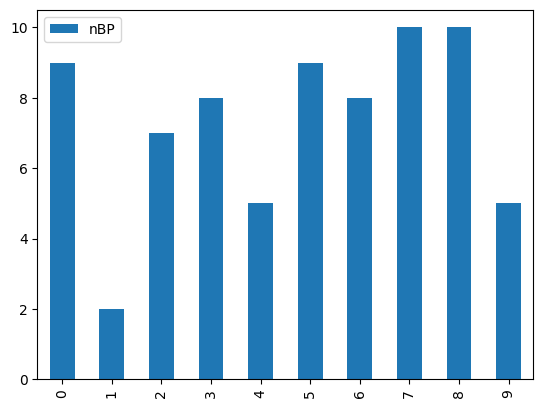

In [79]:
df.groupby(["categoryLabel","themeLabel"]).nBP.sum().to_frame().reset_index().plot.bar()

In [80]:
import plotly.express as px

In [82]:
fig = px.sunburst(df, path=['categoryLabel', 'themeLabel','interventionLabel'], values='nBP',width=1200, height=1200)
fig.show()
fig.write_image("intervention_count.png")